In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import seaborn as sns
import random as rd
import datetime as dt
from termcolor import colored
from datetime import date
from datetime import datetime

In [0]:
t1=pd.read_csv('transactions_1.csv')
t2=pd.read_csv('transactions_2.csv')
t3=pd.read_csv('transactions_3.csv')
# concatenate the 3 datasets into 1 with all transactions
trans=pd.concat([t1, t2, t3]) 

print('Shape of the transactions dataset',trans.shape)
print('Number of null in each column',trans.isna().sum())
print(trans.sample(5))
trans.info()

Shape of the transactions dataset (2181026, 12)
Number of null in each column transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64
             transaction_id  ...                created_date
238022  transaction_1738022  ...  2019-01-13 12:45:45.015943
272541  transaction_1772541  ...  2019-04-13 02:42:32.211458
16855   transaction_1516855  ...  2019-03-12 13:26:04.110782
669231   transaction_669231  ...  2018-07-20 14:55:13.883536
228279  transaction_1028279  ...  2019-04-13 07:38:24.017545

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181026 entries, 0 to 681025
Data columns (total 12 columns):
 #   Column             

In [0]:
trans.head(2)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032


In [0]:
trans['created_date'] = pd.to_datetime(trans['created_date'])

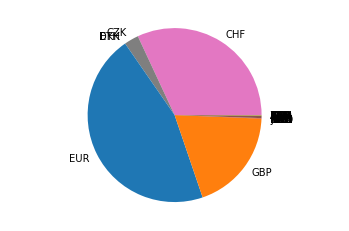

In [0]:
sums = trans.amount_usd.groupby(trans.transactions_currency).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [0]:
def change_currency(cur):
  if cur == 'CHF':
    return 'CHF'
  elif cur == 'GBP':
    return 'GBP'
  elif cur == 'EUR':
    return 'EUR'
  else:
    return 'OTHER'

In [0]:
trans['transactions_currency'] = trans['transactions_currency'].apply(change_currency)
trans['transactions_currency'].value_counts()

EUR      931327
GBP      702488
OTHER    515920
CHF       31291
Name: transactions_currency, dtype: int64

In [0]:
trans = pd.concat([pd.get_dummies(trans['transactions_currency']), trans], axis=1)
trans.head(2)

,CHF,EUR,GBP,OTHER,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,0,0,0,1,transaction_0,TRANSFER,OTHER,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,0,0,0,1,transaction_1,CARD_PAYMENT,OTHER,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032


In [0]:
df = pd.merge(us, trans, on='user_id', how='inner')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,user_id,total_amount,number_transactions,avg_amount,first_transaction,last_transaction,transaction_period,Australia,EastEurope,NorthEurope,SouthEurope,WestEurope,year_2018,year_2019,age,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,created_year,created_month,created_date_y,user_active_time,user_trans_time,user_trans_periodicity,CHF,EUR,GBP,OTHER,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,created_date
0,0,0,user_0,6925.08,520,13.317462,2018-09-10 18:54:08.965855,2019-05-10 05:09:13.868855,241.5,0,0,0,0,1,1,0,28,WestEurope,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,2018,9,2018-09-10 18:46:42.843855,247,247,0.001923,0,1,0,0,transaction_1651480,TOPUP,EUR,0.85,FAILED,NaN,NaN,NaN,NaN,INBOUND,2018-09-10 19:09:54.750855
1,0,0,user_0,6925.08,520,13.317462,2018-09-10 18:54:08.965855,2019-05-10 05:09:13.868855,241.5,0,0,0,0,1,1,0,28,WestEurope,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,2018,9,2018-09-10 18:46:42.843855,247,247,0.001923,0,1,0,0,transaction_1652009,CARD_PAYMENT,EUR,47.74,DECLINED,FALSE,7011.0,Valencia,ESP,OUTBOUND,2018-09-30 19:31:53.900855


In [0]:
trans.head(2)

,CHF,EUR,GBP,OTHER,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,0,0,0,1,transaction_0,TRANSFER,OTHER,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,0,0,0,1,transaction_1,CARD_PAYMENT,OTHER,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032


In [0]:
pd.crosstab(df['transactions_currency'],df['plan'])

plan,0,1
transactions_currency,,
CHF,19360,11926
EUR,737902,192956
GBP,539675,162713
OTHER,388185,127639


In [0]:
trans=trans[trans.transactions_state=='COMPLETED']
print(trans['transactions_state'].value_counts())

COMPLETED    1916387
Name: transactions_state, dtype: int64


In [0]:
trans_grouped = trans.groupby(['user_id'], as_index=True)['amount_usd'].agg(['sum','count','mean'])
trans_grouped.rename(columns={'sum':'total_amount', 'count':'number_transactions','mean':'avg_amount'}, inplace=True)
trans_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14821 entries, user_0 to user_9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_amount         14821 non-null  float64
 1   number_transactions  14821 non-null  int64  
 2   avg_amount           14821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 463.2+ KB


In [0]:
#trans_grouped.to_csv('trans_amount_vol.csv')

In [0]:
trans['created_date'].min()

Timestamp('2018-01-01 08:53:48.538709')

In [0]:
trans_grouped2 = trans.groupby(['user_id'], as_index=True)['created_date'].agg(['min','max'])
trans_grouped2.rename(columns={'min':'first_transaction', 'max':'last_transaction'}, inplace=True)
trans_grouped2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14821 entries, user_0 to user_9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_transaction  14821 non-null  datetime64[ns]
 1   last_transaction   14821 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 347.4+ KB


In [0]:
trans_grouped2.head(2)

,first_transaction,last_transaction
user_id,,
user_0,2018-09-10 18:54:08.965855,2019-05-10 05:09:13.868855
user_1,2018-02-04 08:28:17.978146,2019-05-04 02:30:11.492146


In [0]:
trans_grouped_currency = trans.groupby(['user_id'], as_index=True)['CHF','EUR','GBP','OTHER'].agg('sum')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [0]:
trans_grouped_currency.head(2)

,CHF,EUR,GBP,OTHER
user_id,,,,
user_0,0.0,25.0,0.0,495.0
user_1,0.0,133.0,0.0,0.0


In [0]:
trans_grouped2['transaction_period']=(trans_grouped2['last_transaction']-trans_grouped2['first_transaction'])
print(trans_grouped2.head(4))
trans_grouped2['transaction_period']=trans_grouped2['transaction_period'].dt.days +0.5
#['transaction_period'].days
print(trans_grouped2.head(4))

                  first_transaction  ...       transaction_period
user_id                              ...                         
user_0   2018-09-10 18:54:08.965855  ... 241 days 10:15:04.903000
user_1   2018-02-04 08:28:17.978146  ... 453 days 18:01:53.514000
user_10  2018-06-29 15:38:15.855413  ... 315 days 21:29:26.769000
user_100 2018-12-02 14:23:12.926151  ...  83 days 23:13:37.128000

[4 rows x 3 columns]
                  first_transaction  ... transaction_period
user_id                              ...                   
user_0   2018-09-10 18:54:08.965855  ...              241.5
user_1   2018-02-04 08:28:17.978146  ...              453.5
user_10  2018-06-29 15:38:15.855413  ...              315.5
user_100 2018-12-02 14:23:12.926151  ...               83.5

[4 rows x 3 columns]


In [0]:
trans_grouped_all = pd.merge(trans_grouped, trans_grouped2, on='user_id', how='inner')
trans_grouped_all.sample(5)

,total_amount,number_transactions,avg_amount,first_transaction,last_transaction,transaction_period
user_id,,,,,,
user_13663,1141.18,35,32.605143,2018-02-28 04:10:59.050089,2019-03-02 08:59:38.173089,367.5
user_10443,9780.12,227,43.084229,2018-08-23 14:58:25.245929,2019-05-07 12:23:15.178929,256.5
user_7838,3243.96,79,41.062785,2018-03-12 04:27:19.762191,2019-01-18 21:36:59.767191,312.5
user_10022,5757.73,219,26.291005,2018-03-31 22:51:40.792260,2019-05-08 10:06:07.164260,402.5
user_12857,7409.77,433,17.112633,2018-09-10 00:20:49.934832,2019-03-29 02:48:04.773832,200.5


In [0]:
#def period(var1):
 # return (var1[1]/var1[0])
#trans_grouped_all['periodicity_trans']=trans_grouped_all[['number_transactions','transaction_period']].apply(period)
#trans_grouped_all['periodicity_trans']=trans_grouped_all['transaction_period']/trans_grouped_all['number_transactions']
#trans_grouped_all['transactions_perday']=1/trans_grouped_all['periodicity_trans']

In [0]:
trans_grouped_all_currency=pd.merge(trans_grouped_all, trans_grouped_currency, on='user_id', how='inner')

In [0]:
trans_grouped_all_currency.head(4)

,total_amount,number_transactions,avg_amount,first_transaction,last_transaction,transaction_period,CHF,EUR,GBP,OTHER
user_id,,,,,,,,,,
user_0,6925.08,520,13.317462,2018-09-10 18:54:08.965855,2019-05-10 05:09:13.868855,241.5,0.0,25.0,0.0,495.0
user_1,12955.54,133,97.410075,2018-02-04 08:28:17.978146,2019-05-04 02:30:11.492146,453.5,0.0,133.0,0.0,0.0
user_10,5438.92,123,44.218862,2018-06-29 15:38:15.855413,2019-05-11 13:07:42.624413,315.5,0.0,122.0,0.0,1.0
user_100,4230.10,55,76.910909,2018-12-02 14:23:12.926151,2019-02-24 13:36:50.054151,83.5,0.0,55.0,0.0,0.0


In [0]:
print(trans_grouped_all_currency[trans_grouped_all_currency['transaction_period']==0])

Empty DataFrame
Columns: [total_amount, number_transactions, avg_amount, first_transaction, last_transaction, transaction_period, CHF, EUR, GBP, OTHER]
Index: []


In [0]:
print(trans_grouped_all_currency.loc['user_10031',:])

total_amount                                 9.79
number_transactions                             2
avg_amount                                  4.895
first_transaction      2019-04-08 18:25:04.154064
last_transaction       2019-04-08 18:29:17.730064
transaction_period                            0.5
CHF                                             0
EUR                                             2
GBP                                             0
OTHER                                           0
Name: user_10031, dtype: object


In [0]:
print(trans['created_date'].max())

2019-05-15 21:18:22.660896


In [0]:
# trans_grouped_all.to_csv('trans_amount_periods.csv')

In [0]:
us=pd.read_csv('trans_users_dev1.csv')

In [0]:
us.head(2)

,Unnamed: 0,Unnamed: 0.1,user_id,total_amount,number_transactions,avg_amount,first_transaction,last_transaction,transaction_period,Australia,EastEurope,NorthEurope,SouthEurope,WestEurope,year_2018,year_2019,age,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,created_year,created_month,created_date_y,user_active_time,user_trans_time,user_trans_periodicity
0,0,0,user_0,6925.08,520,13.317462,2018-09-10 18:54:08.965855,2019-05-10 05:09:13.868855,241.5,0,0,0,0,1,1,0,28,WestEurope,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,2018,9,2018-09-10 18:46:42.843855,247,247,0.001923
1,1,1,user_1,12955.54,133,97.410075,2018-02-04 08:28:17.978146,2019-05-04 02:30:11.492146,453.5,0,1,0,0,0,1,0,35,EastEurope,Klaipeda,2018-01-11 18:53:10.531146,1,0,1.0,1.0,75,0,0,1,2018,1,2018-01-11 18:53:10.531146,489,465,0.007150


In [0]:
data = pd.merge(trans_grouped_all_currency, us, on='user_id', how='inner')
data.sample(5)

,user_id,total_amount_x,number_transactions_x,avg_amount_x,first_transaction_x,last_transaction_x,transaction_period_x,CHF,EUR,GBP,OTHER,Unnamed: 0,Unnamed: 0.1,total_amount_y,number_transactions_y,avg_amount_y,first_transaction_y,last_transaction_y,transaction_period_y,Australia,EastEurope,NorthEurope,SouthEurope,WestEurope,year_2018,year_2019,age,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,created_year,created_month,created_date_y,user_active_time,user_trans_time,user_trans_periodicity
11415,user_6803,24.99,3,8.330000,2018-07-16 10:22:50.535357,2018-07-16 10:30:27.938357,0.5,0.0,0.0,3.0,0.0,11415,11415,24.99,3,8.330000,2018-07-16 10:22:50.535357,2018-07-16 10:30:27.938357,0.5,0,0,1,0,0,1,0,57,NorthEurope,Godalming,2018-07-16 10:02:14.708357,0,0,1.0,1.0,28,0,0,0,2018,7,2018-07-16 10:02:14.708357,303,303,0.333333
9400,user_4886,27458.92,270,101.699704,2018-06-08 17:06:12.797826,2019-05-10 12:23:48.374826,335.5,0.0,186.0,6.0,78.0,9400,9400,27458.92,270,101.699704,2018-06-08 17:06:12.797826,2019-05-10 12:23:48.374826,335.5,0,0,1,0,0,1,0,54,NorthEurope,Luxembourg,2018-06-08 17:01:05.268826,1,1,1.0,1.0,6,0,0,1,2018,6,2018-06-08 17:01:05.268826,341,341,0.003704
13921,user_9152,20828.41,449,46.388441,2018-07-04 11:07:27.122772,2019-01-28 06:46:11.870772,207.5,0.0,210.0,239.0,0.0,13921,13921,20828.41,449,46.388441,2018-07-04 11:07:27.122772,2019-01-28 06:46:11.870772,207.5,0,0,0,0,1,1,0,23,WestEurope,Bois-Guillaume,2018-06-28 06:10:14.506772,0,0,1.0,1.0,6,0,0,1,2018,6,2018-06-28 06:10:14.506772,321,315,0.002186
5164,user_14851,14.18,5,2.836000,2018-11-28 06:03:39.378913,2019-01-12 05:11:50.428913,44.5,0.0,5.0,0.0,0.0,5164,5164,14.18,5,2.836000,2018-11-28 06:03:39.378913,2019-01-12 05:11:50.428913,44.5,0,0,0,0,1,1,0,37,WestEurope,Bâgé-le-Châtel,2018-11-28 06:00:46.369913,0,0,1.0,1.0,3,0,0,1,2018,11,2018-11-28 06:00:46.369913,168,168,0.200000
3595,user_13388,2541.26,65,39.096308,2018-06-08 11:33:31.851747,2019-02-08 13:44:06.792747,245.5,0.0,65.0,0.0,0.0,3595,3595,2541.26,65,39.096308,2018-06-08 11:33:31.851747,2019-02-08 13:44:06.792747,245.5,0,0,1,0,0,1,0,26,NorthEurope,Hollywood,2018-05-30 14:46:13.045747,0,0,1.0,1.0,26,0,0,1,2018,5,2018-05-30 14:46:13.045747,350,341,0.014989


In [0]:
data.to_csv('trans_users_dev_currency.csv')

In [0]:
trans = trans[trans.direction == 'OUTBOUND']
trans_direction = trans.groupby(['user_id'], as_index=True)['direction'].agg(['count'])
trans_direction.rename(columns={'count':'profit'}, inplace=True)
trans_direction.head(4)

# pd.crosstab(index = data['user_id'], columns = trans_direction['profit'])

,profit
user_id,
user_0,357
user_1,106
user_10,71
user_100,44
